<center><font = 'Arial' size = 32>CNN Project - Face Recognition</font></center>

**Author:** Vinayak Hampiholi

# <a name = 'link0'> Index </a>

- <a href = #link0> Index </a>
- <a href = #link1> Description </a>
    - <a href = #link11> Context </a>
    - <a href = #link12> Objective </a>
        - <a href = #link121> Part - A To build a face detection system </a>
        - <a href = #link122> Part - B To create an image dataset to be used by the AI team to build image classifier data </a>
        - <a href = #link123> Part - C To build a face recognition system </a>
    - <a href = #link13> Data Dictionary </a>
        - <a href = #link131> Part - A </a>
        - <a href = #link132> Part - B </a>
        - <a href = #link133> Part - C </a>
    - <a href = #link14> Import the necessary libraries </a>
- <a href = #link2> I. Part - A </a>
    - <a href = #link21> Part I: Data Preprocessing and Visualization </a>
        - <a href = #link211> a) Import the data "Images.npy" </a>
        - <a href = #link212> b) Split the images and their mask into two objects </a>
        - <a href = #link213> c) Resize the images and masks to the same shape and visualize the original and masked images </a>
        - <a href = #link214> d) Split the data into train and test </a>
    - <a href = #link22> Part I: Model Building and Evaluation </a>
        - <a href = #link221> a) Design a face mask detection model </a>
        - <a href = #link222> b) Evaluate and share insights on performance of the model </a>
        - <a href = #link223> c) Predict and visualize the masks for the test images </a>
    - <a href = #link23> Part I: Predicting Face Masks from Images </a>
        - <a href = #link231> a) Import images from folder ‘training_images’ </a>
        - <a href = #link232> b) Detect faces, extract metadata for the faces in all the images, and write and save it into a DataFrame </a>
- <a href = #link3> II. Part - B </a>
    - <a href = #link31> Part II: Data Processing </a>
        - <a href = #link311> a) Import the data ‘PINS.zip’ </a>
        - <a href = #link312> b) Read the images and extract labels from the filenames for all the folders </a>
    - <a href = #link32> Part II: Visualizing Similar Images </a>
        - <a href = #link321> a) Generate embedding vectors for each image in the dataset </a>
        - <a href = #link322> b) Choose a distance metric and use it along with a threshold to display similar and dissimilar images </a>
- <a href = #link4> III. Part - C </a>
    - <a href = #link41> Part III: Model Building and Inference </a>
        - <a href = #link411> a) Apply PCA on the embedding vectors </a>
        - <a href = #link412> b) Build and train a SVM classifier on top of it </a>
        - <a href = #link413> c) Use the trained SVM model to predict the labels of the test images </a>
- <a href = #link5> IV. Actionable Insights & Recommendations </a>
    - <a href = #link51> Part IV: Write down insights from the analysis conducted </a>
    - <a href = #link52> Part IV: Provide actionable business recommendations </a>

# <a name = 'link1'> Description </a>

## <a name = 'link11'> Context </a>

Company X owns a movie application and repository that caters to movie streaming to millions of users on a subscription basis. The company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on the cast information button, the app will show details of the actor in the scene. The company has in-house computer vision and multimedia experts who need to detect faces from screenshots of the movie scene.

## <a name = 'link12'> Objective </a>

### <a name = 'link121'> Part - A To build a face detection system </a>

### <a name = 'link122'> Part - B To create an image dataset to be used by the AI team to build image classifier data </a>

### <a name = 'link123'> Part - C To build a face recognition system</a>

## <a name = 'link13'> Data Dictionary </a>

### <a name = 'link131'> Part A </a>

- **label:** Identifies the object in the image
- **notes:** Additional comments (currently empty)
- **points:** Co-ordinates of the mask (top-left and bottom-right)
- **imageWidth:** Width of the image in pixels
- **imageHeight:** Height of the image in pixels

### <a name = 'link132'> Part B </a>

The dataset comprises facial images that may contain either multiple individuals or a single individual per image.

### <a name = 'link133'> Part C </a>

This dataset consists of 10,770 images collected from Pinterest, featuring 100 individuals.

## <a name = 'link14'> Import Libraries </a>

In [2]:
# Set the logging only for the errors
import logging
logging.getLogger("matplotlib").setLevel(logging.ERROR)

In [3]:
# Make warnings not displayed
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import display and MarkDown from IPython to display the messages in text cell via python code block
import IPython
from IPython.display import display, Markdown, Image
display(Markdown("**Observations:**\n- IPython version {}.".format(IPython.__version__)))

**Observations:**
- IPython version 8.31.0.

In [5]:
# Import numpy for loading npy data
import numpy as np
display(Markdown("**Observations:**\n- Numpy version {}.".format(np.__version__)))

**Observations:**
- Numpy version 1.26.4.

In [6]:
# Import pyplot from matplotlib to pictorize the image data
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec as gdspec

display(Markdown("**Observations:**\n- matplotlib version {}.".format(matplotlib.__version__)))

**Observations:**
- matplotlib version 3.7.1.

In [7]:
# Import cv2 package
import cv2
display(Markdown("**Observations:**\n- cv2 version {}.".format(cv2.__version__)))

**Observations:**
- cv2 version 4.10.0.

In [22]:
# Import tensorflow packages
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Activation, BatchNormalization, SpatialDropout2D
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

display(Markdown("**Observations:**\n- tensorflow version {}.".format(tf.__version__)))

**Observations:**
- tensorflow version 2.18.0.

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

display(Markdown("**Observations:**\n- skelarn version {}.".format(sklearn.__version__)))

**Observations:**
- skelarn version 1.5.1.

In [9]:
# Import random package to print the random number
import random

In [10]:
# Import os
import os

In [11]:
# Import pandas
import pandas as pd

display(Markdown("**Observations:**\n- pandas version {}.".format(pd.__version__)))

**Observations:**
- pandas version 1.5.3.

In [12]:
# Import zip file
from zipfile import ZipFile

In [13]:
# Import tqdm to show the progress
from tqdm.notebook import tqdm

# <a name = 'link2'> I. Part - A </a>

## <a name = 'link21'> Part I: Data Preprocessing and Visualization </a>

### <a name = 'link211'> a) Import the data "Images.npy" </a>

a) Import and Understand the data:


Dataset info


The dataset is encoded in npy format which is another standard file format which is used in industries to reduce memory ( RAM )  consumption

 b) Import and Read ‘Images.npy’


https://stackoverflow.com/questions/33480297/viewing-npy-images


https://note.nkmk.me/en/python-numpy-load-save-savez-npy-npz/

Npy files are X train and X test data

In [14]:
# Import and read "images.npy" allow_pickle = True allows the load command to succeed
ImageURL = "Images.npy"
ImagesData = np.load(ImageURL, allow_pickle = True)
if ImagesData is None:
    display(Markdown("**Observations:**\n- Errors occurred while loading the data and the data loading is unsuccessful."))
else:
    display(Markdown("**Observations:**\n- No errors occurred while loading the data and the data loading is successful."))

**Observations:**
- No errors occurred while loading the data and the data loading is successful.

In [15]:
# Dataset info
display(Markdown("**Observations:**\n"))
display(Markdown("- There are {} rows and {} columns in the Image Dataset.".format(ImagesData.shape[0], ImagesData.shape[1])))
display(Markdown("- The datatype is {}.".format(ImagesData.dtype)))
display(Markdown("- The number of dimensions is {}.".format(ImagesData.ndim)))
display(Markdown("- The number of elements is {}.".format(ImagesData.size)))

**Observations:**


- There are 393 rows and 2 columns in the Image Dataset.

- The datatype is object.

- The number of dimensions is 2.

- The number of elements is 786.

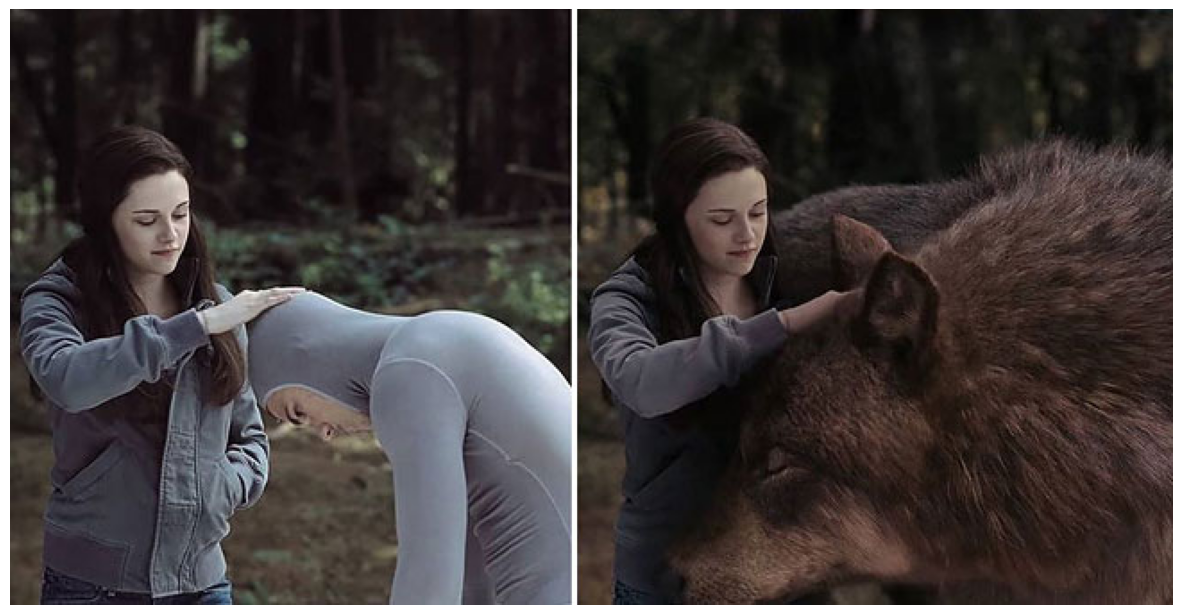

In [16]:
 # Understand the data by analyzing the first 1 row and their first column
for i in range(0, 1):
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.axis("off")
    plt.imshow(ImagesData[i][0])
plt.show()

In [17]:
# Understand the data by analyzing the first 1 row and their second column
for i in range(0, 1):
    print(ImagesData[i][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


**Observations:**
- There are images in the first column and the label with points on the second column.

In [18]:
# Check the image height and width of first 1 values
for i in range(0, 1):
    print("Image Width: " + str(ImagesData[i][1][0]["imageWidth"]) + " and Image Height: " + str(ImagesData[i][1][0]["imageHeight"]))

Image Width: 650 and Image Height: 333


**Observations:**
- Different images have different sizes.
- We will be using a unified size for all the images for further processes.

### <a name = 'link212'> b) Split the images and their mask into two objects </a>

In [19]:
# Setting the image dimensions to 224 as we will be using the pre-trained model mobilenet and this requires the image size to be 224 as mentioned in https://keras.io/api/applications/mobilenet/
ALPHA = 1

IMAGE_SIZE = 224
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

**Create features and labels**
- Images will be stroed in X
- Masks will be stored in ImageMaskData

In [20]:
# Split the image and their mask into two object
ImageMaskData = np.zeros((int(ImagesData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(ImagesData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

### <a name = 'link213'> c) Resize the images and masks to the same shape and visualize the original and masked images </a>

In [23]:
# Use cv2.resize() to resize the images with interpolation=cv2.INTER_CUBIC so that we can use Cubic Interpolation that maintains the higher quality
for index in range(ImagesData.shape[0]):
    image = ImagesData[index][0]
    image = cv2.resize(image, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      image = image[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(image, dtype = np.float32))
    for i in ImagesData[index][1]:
        x1 = int(i["points"][0]["x"] * IMAGE_HEIGHT)
        x2 = int(i["points"][1]["x"] * IMAGE_WIDTH)
        y1 = int(i["points"][0]["y"] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]["y"] * IMAGE_WIDTH)
        ImageMaskData[index][y1:y2, x1:x2] = 1

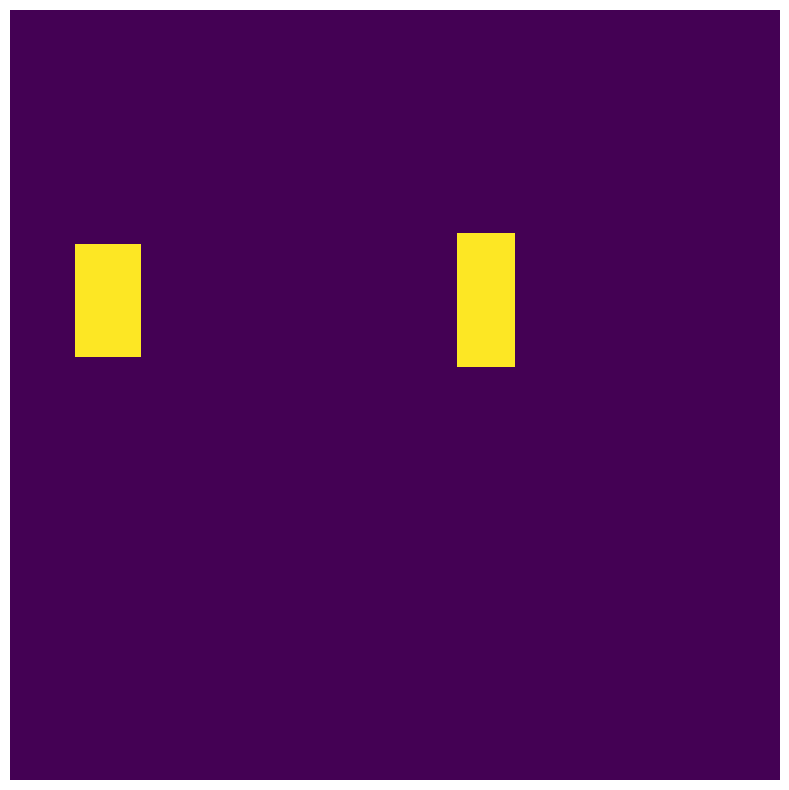

In [24]:
# Print the first 1 masked images
for i in range(0, 1):
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.axis("off")
    plt.imshow(ImageMaskData[i])
plt.show()

### <a name = 'link214'> d) Split the data into train and test </a>

c) Split the data into Features(X) & labels(Y). Unify shape of all the images.

Either train test split can be used to mention the % of data

For example there are 1000 images , 700 images forms 70 % of the data , In similar way for 409 images, calculate the % of data for train and test

Another way to split :

If df is a data frame which has npy images say 110 images

Train= df [ :100 ] train will have 100 images

Test= df[100:] test will have 10 images

In [23]:
# There are 393 rows in the images.npy 70-30% split needs to be calculated
TrainSize = round(ImagesData.shape[0] * 70 / 100)
TestSize = round(ImagesData.shape[0] * 30 / 100)
display(Markdown("**Observations:**\n"))
display(Markdown("- The 70% of total rows {} is {}.".format(ImagesData.shape[0], TrainSize)))
display(Markdown("- The 30% of total rows {} is {}.".format(ImagesData.shape[0], TestSize)))

**Observations:**


- The 70% of total rows 393 is 275.

- The 30% of total rows 393 is 118.

The description in the problem statement says that there are 409 images. However, only 393 images were found while loading the data. Hence proceeding with the same count.

In [24]:
# Split the data according to TrainSize and TestSize
XTrain = X[:TrainSize]
YTrain = ImageMaskData[:TrainSize]

XTest = X[TrainSize:]
YTest = ImageMaskData[TrainSize:]

In [25]:
# Check the rows and column details of train and test datasets
display(Markdown("**Observations:**\n"))
display(Markdown("- There are {} rows and {} columns in the XTrain.".format(XTrain.shape[0], XTrain.shape[1])))
display(Markdown("- There are {} rows and {} columns in the XTest.".format(XTest.shape[0], XTest.shape[1])))
display(Markdown("- There are {} rows and {} columns in the YTrain.".format(YTrain.shape[0], YTrain.shape[1])))
display(Markdown("- There are {} rows and {} columns in the YTest.".format(YTest.shape[0], YTest.shape[1])))

**Observations:**


- There are 275 rows and 224 columns in the XTrain.

- There are 118 rows and 224 columns in the XTest.

- There are 275 rows and 224 columns in the YTrain.

- There are 118 rows and 224 columns in the YTest.

d) What is Unify shape of all images ?


→ Its resizing of the Images as per architecture used. https://keras.io/api/applications/mobilenet/ mentions that the size of the image should be 224, 224. Hence using the same.

e) Select random image from the train data and display original image and masked image.


→ Select any random image from training data and then display the original image and its mask separately.

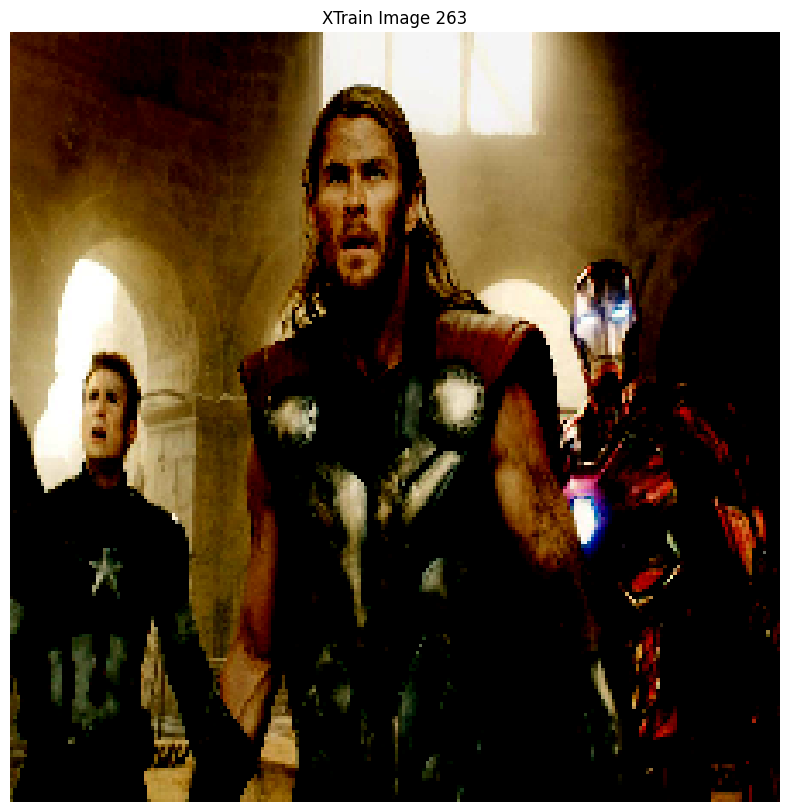

In [26]:
# Select a random number between 0 to TrainSize and print the Train data
random_number = random.randint(0, TrainSize)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("XTrain Image "+ str(random_number))
plt.imshow(XTrain[random_number])
plt.show()

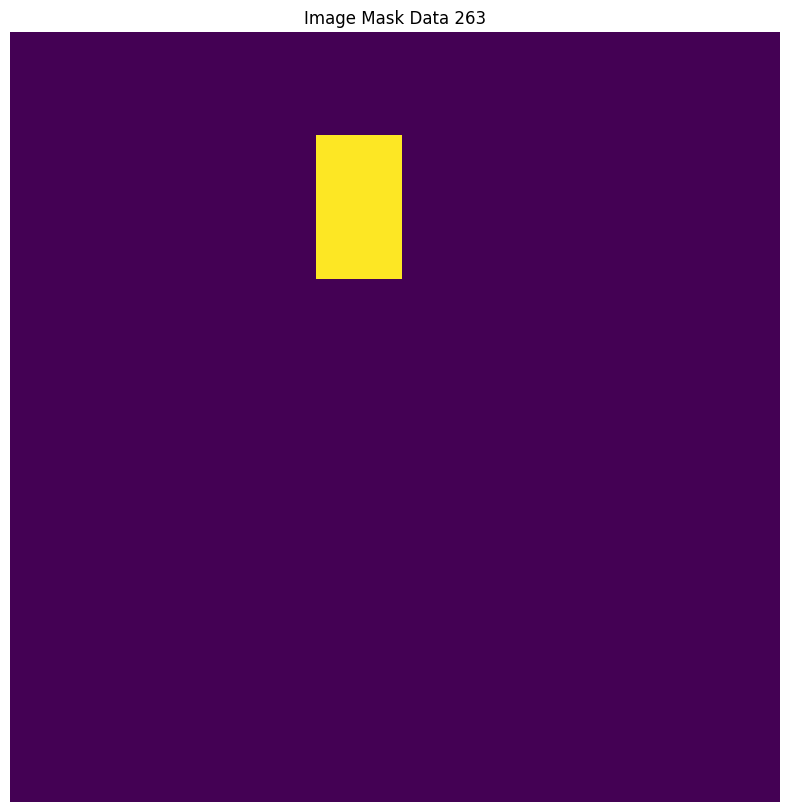

In [27]:
# Print the Image Masked Data for the same random number
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("Image Mask Data " + str(random_number))
plt.imshow(ImageMaskData[random_number])
plt.show()

## <a name = 'link22'> Part I: Model Building and Evaluation </a>

### <a name = 'link221'> a) Design a face mask detection model </a>

f) Model building  - Q2.A - Refer to the below link

https://blog.paperspace.com/unet-architecture-image-segmentation/

g) Design your own Dice Coefficient and Loss function.

Implement a user defined function to define dice coefficient to calculate the loss.

Other information:


Information on Masking : https://www.tertiaryinfotech.com/masking-in-opencv/


Hence masks are Y train and Y test data


Final expectation of the project : To predict a mask on a given image

In [28]:
# The MobileNet model from keras.api.applications.mobilenet is a pre-trained deep neural network designed for mobile and embedded vision applications. 
# It is part of the Keras Applications module and is widely used due to its lightweight architecture and efficiency, making it ideal for resource-constrained environments.
# This function creates the model using MobileNet with additional layers
# MobileNet is a powerful powerful pre-trained model and more details can be obtained here: https://arxiv.org/pdf/1704.04861

def conv_block_simple(prevlayer, filters, prefix, strides=(1, 1)):
    conv = Conv2D(filters, (3, 3), padding = "same", kernel_initializer = "he_normal", strides = strides, name = prefix + "_conv")(prevlayer)
    conv = BatchNormalization(name = prefix + "BatchNormalization")(conv)
    conv = Activation("relu", name = prefix + "ActivationLayer")(conv)
    return conv

def create_model(trainable = True):
    model = MobileNet(input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top = False, alpha = ALPHA, weights = "imagenet")
    for layer in model.layers:
        layer.trainable = trainable
    
    block1 = model.get_layer("conv_pw_13_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_3_relu").output
    block5 = model.get_layer("conv_pw_1_relu").output
    
    up1 = Concatenate()([UpSampling2D()(block1), block2])
    conv6 = conv_block_simple(up1, 256, "Conv_6_1")
    conv6 = conv_block_simple(conv6, 256, "Conv_6_2")

    up2 = Concatenate()([UpSampling2D()(conv6), block3])
    conv7 = conv_block_simple(up2, 256, "Conv_7_1")
    conv7 = conv_block_simple(conv7, 256, "Conv_7_2")

    up3 = Concatenate()([UpSampling2D()(conv7), block4])
    conv8 = conv_block_simple(up3, 192, 'Conv_8_1')
    conv8 = conv_block_simple(conv8, 128, 'Conv_8_2')

    up4 = Concatenate()([UpSampling2D()(conv8), block5])
    conv9 = conv_block_simple(up4, 96, "Conv_9_1")
    conv9 = conv_block_simple(conv9, 64, "Conv_9_2")

    up5 = Concatenate()([UpSampling2D()(conv9), model.input])
    conv10 = conv_block_simple(up5, 48, "Conv_10_1")
    conv10 = conv_block_simple(conv10, 32, "Conv_10_2")
    conv10 = SpatialDropout2D(0.2)(conv10)
    
    x = Conv2D(1, (1, 1), activation = "sigmoid")(conv10)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x)
    return Model(inputs = model.input, outputs = x)

**Observations:**
- Addding MobileNet as model with below parameter values
- input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
- include_top: False
- alpha: 1.0
- weights: "imagenet"
- Adding UNET architecture layers

In [29]:
# Create a model using the above function
model = create_model()

**Observations:**
- Model is created successfully.

In [30]:
# Validate the model creation by printing the summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, 112, 112,  │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, 112, 112,  │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, 112, 112,  │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, 112, 112,  │      2,048 │ conv_dw_1_relu[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, 112, 112,  │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, 112, 112,  │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, 113, 113,  │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, 56, 56,    │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, 56, 56,    │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, 56, 56,    │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, 56, 56,    │      8,192 │ conv_dw_2_relu[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, 56, 56,    │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, 56, 56,    │          0 │ conv_pw_2_bn[0][

 Total params: 10,283,745 (39.23 MB)

 Trainable params: 10,258,689 (39.13 MB)

 Non-trainable params: 25,056 (97.88 KB)

In [31]:
# Create a function to calculate dice_coefficient
# Defining dice coefficient function

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

**Observations:**
- The function dice_coeeficient is created successfully.

In [32]:
# Defining loss function

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

**Observations:**
- Loss function created successfully

****Complie the model using below parameters****
- loss: using the loss function defined above
- optimizer: using Adam optimizer
- metrics: using dice_coefficient function defined above

In [33]:
# Compile the model
adam = Adam(learning_rate = 1e-4, beta_1 = 0.9, beta_2 = 0.999, decay = 0.0, amsgrad = False)
model.compile(loss=loss, optimizer = adam, metrics=[dice_coefficient])

**Observations:**
- Model is compiled successfully.

In [34]:
# Defining the callbacks
checkpoint = ModelCheckpoint("model-{loss:.2f}.weights.h5", monitor = "loss", verbose = 1, save_best_only = True, save_weights_only = True, mode = "min")
stop = EarlyStopping(monitor = "loss", patience = 5, mode = "min")
reduce_lr = ReduceLROnPlateau(monitor = "loss", factor = 0.2, patience = 5, min_lr = 1e-6, verbose = 1, mode = "min")

**Observations:**
- We have defined the checkpoints, early checkpoints and reduced learning rate.

In [35]:
# Train the model using model.fit()
model.fit(XTrain, YTrain, epochs = 30, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop])

Epoch 1/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - dice_coefficient: 0.3164 - loss: 2.0651
Epoch 1: loss improved from inf to 1.84637, saving model to model-1.85.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 270ms/step - dice_coefficient: 0.3164 - loss: 2.0643 - learning_rate: 1.0000e-04
Epoch 2/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - dice_coefficient: 0.3853 - loss: 1.4872
Epoch 2: loss improved from 1.84637 to 1.39649, saving model to model-1.40.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 75s 274ms/step - dice_coefficient: 0.3854 - loss: 1.4869 - learning_rate: 1.0000e-04
Epoch 3/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - dice_coefficient: 0.4559 - loss: 1.2088
Epoch 3: loss improved from 1.39649 to 1.20340, saving model to model-1.20.weights.h5
275/275 ━━━━━━━━━━━━━━━━━━━━ 88s 321ms/step - dice_coefficient: 0.4559 - loss: 1.2088 - learning_rate: 1.0000e-04
Epoch 4/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - dice_coefficient: 0.5010 - loss: 1.0797
Epoch 4: loss improv

**Observations:**
- epochs: 30
- batch_size: 1
- callbacks: using the callbacks defined above
- The best model weights based on the metrics was model-0.13.weights.h5

### <a name = 'link222'> b) Evaluate and share insights on performance of the model </a>

In [36]:
# Use the model.evaluate() to evaluate the model
model.evaluate(XTest, YTest, verbose = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - dice_coefficient: 0.6307 - loss: 0.8664


[0.8698218464851379, 0.6220571994781494]

**Observations:**
- The dice_coefficient is 0.6220571994781494 and loss is 0.8698218464851379.
- The metrics on test data is lower than the training data.

In [37]:
# Load previous model weight
WEIGHTS_FILE = "model-0.13.weights.h5"
learned_model = create_model()
learned_model.load_weights(WEIGHTS_FILE)
YPred = learned_model.predict(XTest, verbose = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


**Observations:**
- The last stored weight model-0.13.weights.h5 was used successfully.

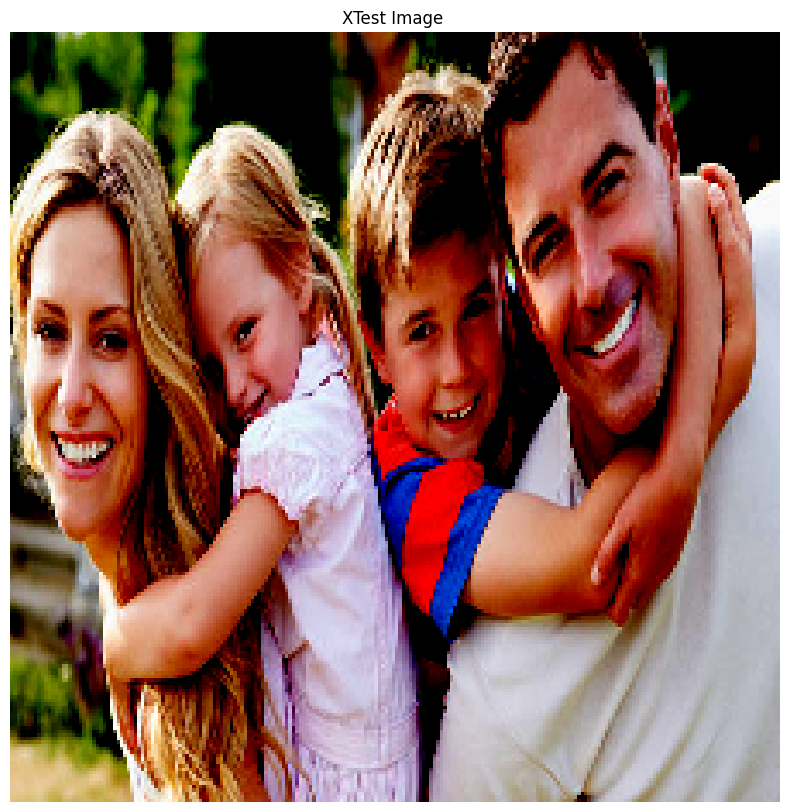

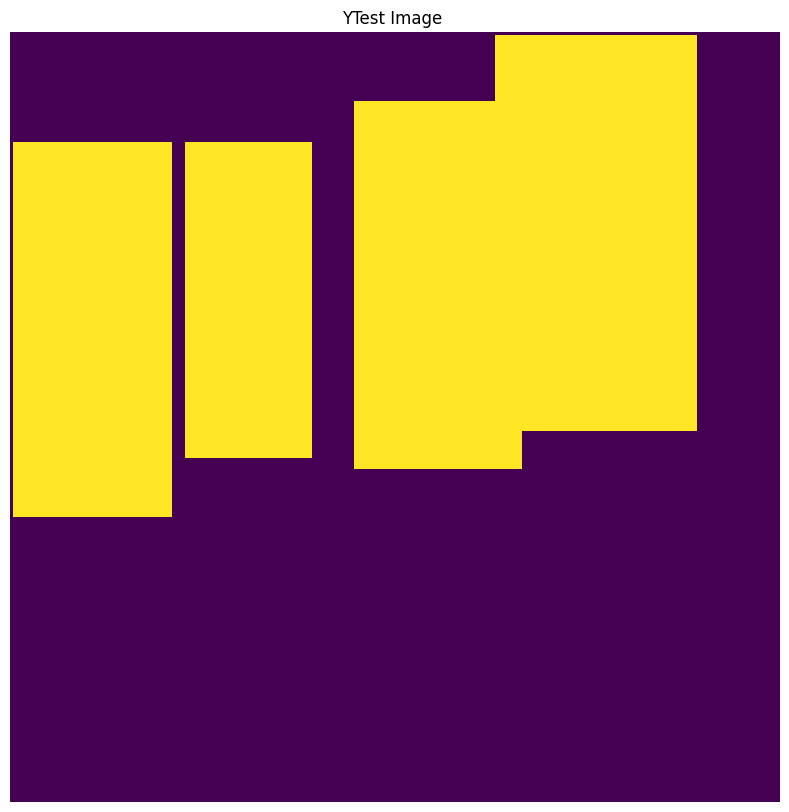

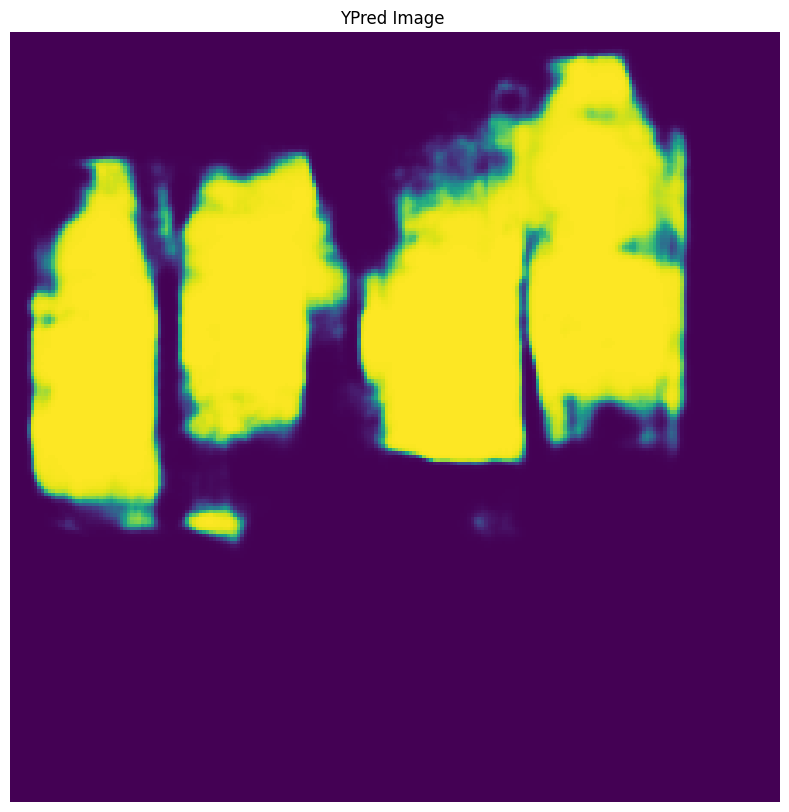

In [38]:
# Validate YPred against YTest with the first value
# Here we are comparing the image index 15

# Print the XTest[15]
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("XTest Image ")
plt.imshow(XTest[15])
plt.show()

# Print the YTest[15]
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("YTest Image ")
plt.imshow(YTest[15])
plt.show()

# Print the YPred[15]
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("YPred Image ")
plt.imshow(YPred[15])
plt.show()

**Observations:**
- The prediction of location of the faces matched the actual location of the faces.
- The model is efficient.

### <a name = 'link223'> c) Predict and visualize the masks for the test images </a>

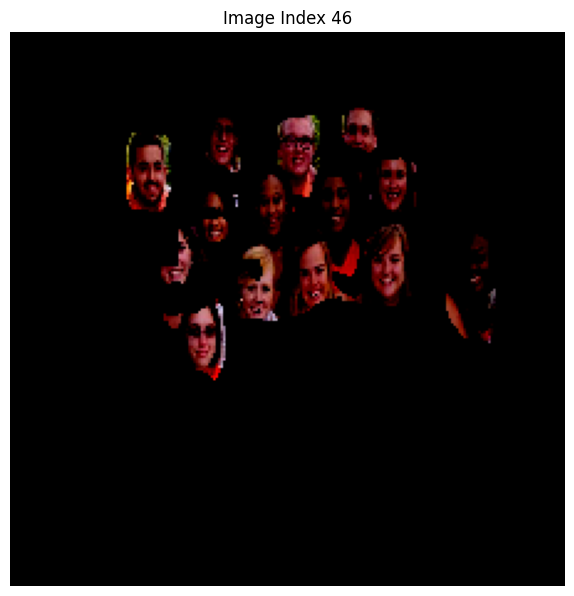

In [39]:
# For a sample image
n = random.randint(0, TestSize)
image = cv2.resize(XTest[n], dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
pred_mask = cv2.resize(1.0 * (YPred[n] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT))

image2 = image
image2[:, :, 0] = pred_mask * image[:, :, 0]
image2[:, :, 1] = pred_mask * image[:, :, 1]
image2[:, :, 2] = pred_mask * image[:, :, 2]
out_image = image2

fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("Image Index " + str(n))
plt.imshow(out_image)
plt.show()

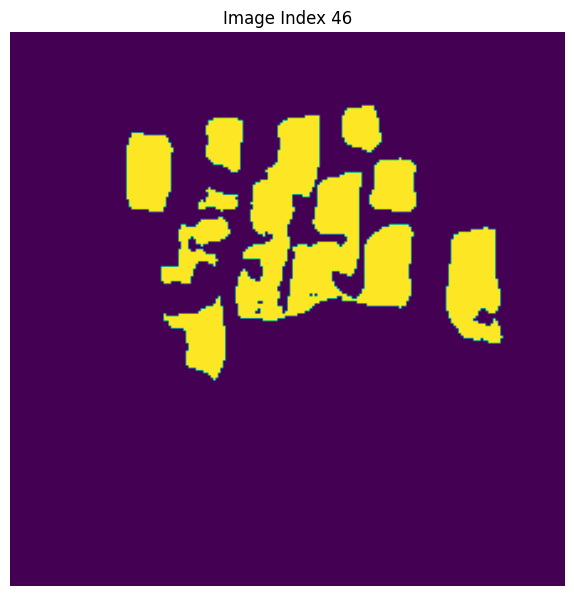

In [40]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.title("Image Index " + str(n))
plt.imshow(pred_mask, alpha = 1)
plt.show()

**Observations:**
- We used model weights (in this case - model-0.13.weights.h5) on our test data to predict the mask around a face.
- As seen in the above example (for image = 15 of our test data), our model does a good job in predicting the masks.

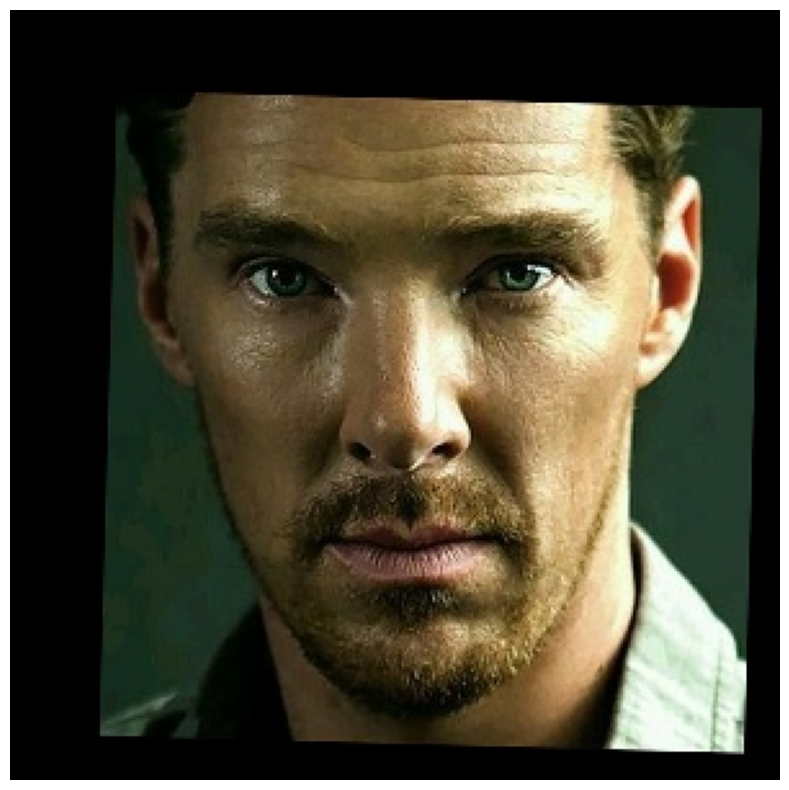

In [113]:
# Import and display Benedict+Cumberbatch9.jpg

Benedict_Cumberbatch_Image = cv2.imread("Benedict+Cumberbatch9.jpg")
Benedict_Cumberbatch_Image_RGB = cv2.cvtColor(Benedict_Cumberbatch_Image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(Benedict_Cumberbatch_Image_RGB)
plt.show()

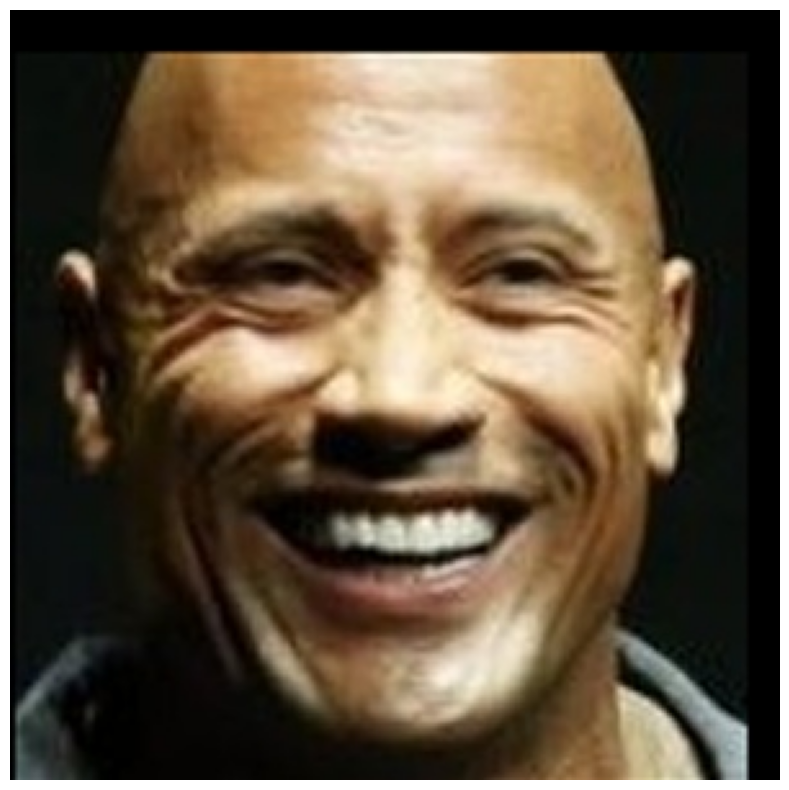

In [114]:
# Import and display Dwayne+Johnson4.jpg
Dwayne_Johnson_Image = cv2.imread("Dwayne+Johnson4.jpg")
Dwayne_Johnson_Image_RGB = cv2.cvtColor(Dwayne_Johnson_Image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(Dwayne_Johnson_Image_RGB)
plt.show()

In [137]:
BCImage = cv2.resize(Benedict_Cumberbatch_Image_RGB, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
DJImage = cv2.resize(Dwayne_Johnson_Image_RGB, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
ImageX = []
ImageX.append(BCImage)
ImageX.append(DJImage)

In [138]:
ImageDataX = np.zeros((2, IMAGE_HEIGHT, IMAGE_WIDTH, 3))

In [139]:
for i in range(0, 2):
    TestImage = cv2.resize(ImageX[i], dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    ImageDataX[i] = preprocess_input(np.array(TestImage, dtype = np.float32))

In [140]:
TestPred = learned_model.predict(ImageDataX, verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


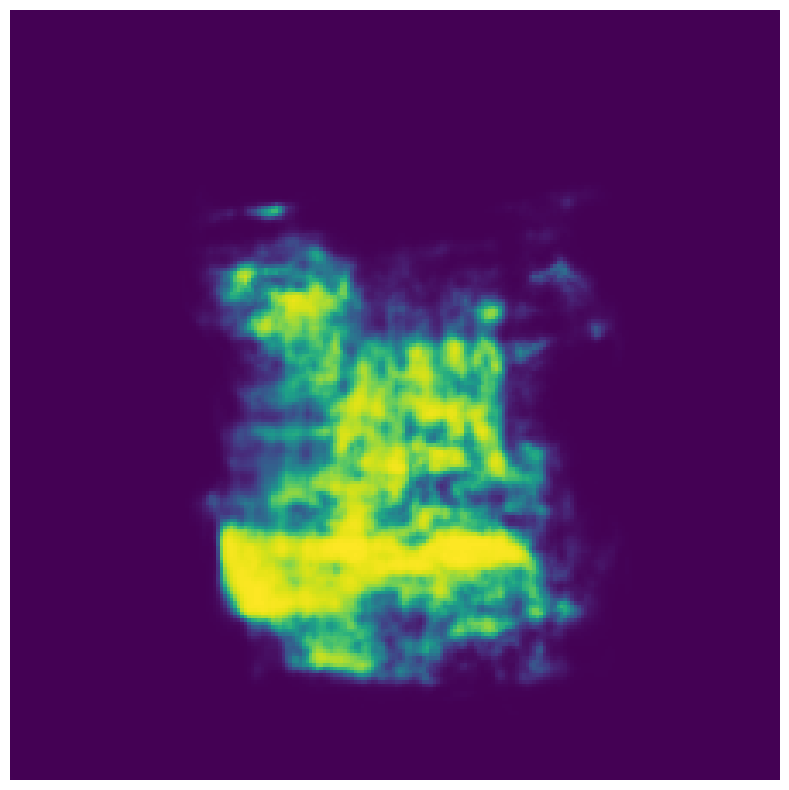

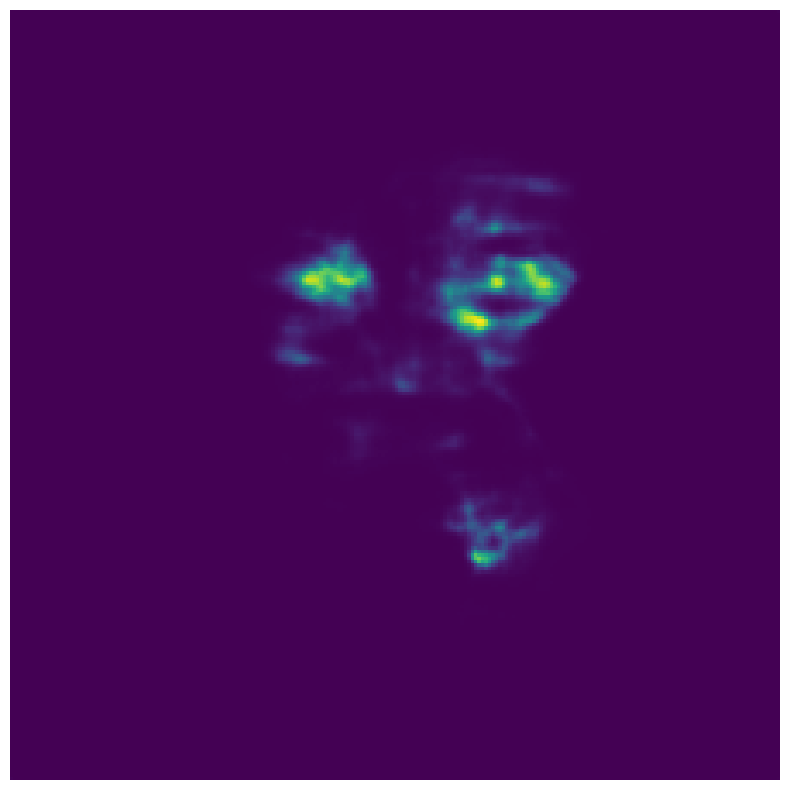

In [141]:
for i in range(0, 2):
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.axis("off")
    plt.imshow(TestPred[i])
plt.show()

**Insights:**

- We used the trained model MobileNet and added the UNET layers to train, fit and evaluate the model.
- Here the model is compiled with binary cross entropy as loss, Adam Optimizer as the optimizer and Dice Coefficient as the metric.
- We used Model Checkpoint, Early Stopping and ReduceLROnPlateau for callbacks.
- We used 70-30 split to divide the images between train and test data.
- After training the model for 30 epochs on training set, the best loss that I had acheived was 0.11 on loss and a dice coefficient of 0.96.
- The training Data Performance: Dice Coefficient (0.9597): Very high, suggesting the model performs well on the training data. The Loss (0.06): Very low, indicating the model fits the training data well.
- Test Data Performance: Dice Coefficient (0.6466) and this is significantly lower compared to the training data, suggesting poor generalization. Loss (0.8639): High, indicating the model struggles to make accurate predictions on the test data.
- Overfitting: The model has learned the training data too well (memorizing specific patterns), resulting in excellent performance on training data but failing to generalize to unseen test data.
- Poor Generalization: The large gap between training and test performance metrics suggests the model has not learned a robust representation that works across different data distributions.

## <a name = 'link23'> Part I: Predicting Face Masks from Images </a>

a) Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.



→ Define an algorithm which can access each and every image from the training images folder and can able to detect all the faces present on the images.

b) From the same loop above, extract metadata of the faces and write into a DataFrame. → Construct a dataframe extracting metadata of the faces using the algorithm defined above.

### <a name = 'link231'> a) Import images from folder ‘training_images’ </a>

In [25]:
# Write down the image directory path that should be loaded. 
# training_images-20211126T092819Z-001.zip is laready unzipped and the training_images directory is already created.
# The directory training_images contains 1081 distinct images 9 additional duplicate images.

ImageFolder = "training_images"
DirList = next(os.walk(ImageFolder))[2]
print(DirList)

['real_00251.jpg', 'real_00537.jpg', 'real_00523.jpg', 'real_00245.jpg', 'real_00279.jpg', 'real_00292.jpg', 'real_00286.jpg', 'real_00735.jpg', 'real_00053.jpg', 'real_00047.jpg', 'real_00721.jpg', 'real_00709.jpg', 'real_00090.jpg', 'real_00084.jpg', 'real_00912.jpg', 'real_00906.jpg', 'real_00641.jpg', 'real_00899.jpg', 'real_00127.jpg', 'real_00133.jpg', 'real_00655.jpg', 'real_00669.jpg', 'real_00682.jpg', 'real_00696.jpg', 'real_00866.jpg', 'real_00872.jpg', 'real_00325.jpg', 'real_00443.jpg', 'real_00457.jpg', 'real_00331.jpg', 'real_00319.jpg', 'real_01007.jpg', 'real_00331(1).jpg', 'real_01013.jpg', 'real_00480.jpg', 'real_00494.jpg', 'real_00319(1).jpg', 'real_00495.jpg', 'real_00481.jpg', 'real_01012.jpg', 'real_01006.jpg', 'real_00318.jpg', 'real_00456.jpg', 'real_00330.jpg', 'real_00324.jpg', 'real_00442.jpg', 'real_00456(1).jpg', 'real_00873.jpg', 'real_00867.jpg', 'real_00697.jpg', 'real_00683.jpg', 'real_00668.jpg', 'real_00132.jpg', 'real_00654.jpg', 'real_00898.jpg', 

**Observations:**
- The directory and the files are accessible.

In [26]:
# Get the metadata of the image directory
display(Markdown("**Observations:**"))
display(Markdown("- The number of files in the directory is: {}.".format(len(DirList))))

**Observations:**

- The number of files in the directory is: 1091.

In [27]:
# Use the below array to store the image data from each file
ImageFileData = []
for filename in os.listdir(ImageFolder):
    # Ensure the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(ImageFolder, filename)
        
        # Read the image
        image = cv2.imread(file_path)
        ImageFileData.append(image)
display(Markdown("**Observations:**\n"))
display(Markdown("- The number files processed is: {}.".format(len(ImageFileData))))

**Observations:**


- The number files processed is: 1091.

In [28]:
#Print the first data 
ImageFileData[0]

array([[[ 0,  8,  1],
        [ 4, 12,  5],
        [ 5, 13,  6],
        ...,
        [10, 19,  9],
        [10, 18,  8],
        [13, 21, 11]],

       [[ 3, 11,  4],
        [ 3, 11,  4],
        [ 1,  9,  2],
        ...,
        [12, 21, 11],
        [ 9, 18,  8],
        [13, 22, 12]],

       [[ 5, 13,  6],
        [ 6, 14,  7],
        [ 3, 11,  4],
        ...,
        [10, 19,  9],
        [ 7, 16,  6],
        [14, 23, 13]],

       ...,

       [[15, 23, 22],
        [16, 24, 23],
        [15, 23, 22],
        ...,
        [10, 15, 13],
        [ 7, 12, 10],
        [ 4,  9,  7]],

       [[23, 31, 30],
        [23, 31, 30],
        [21, 29, 28],
        ...,
        [12, 17, 15],
        [11, 16, 14],
        [ 6, 11,  9]],

       [[27, 35, 34],
        [13, 21, 20],
        [ 9, 17, 16],
        ...,
        [10, 15, 13],
        [11, 16, 14],
        [ 8, 13, 11]]], dtype=uint8)

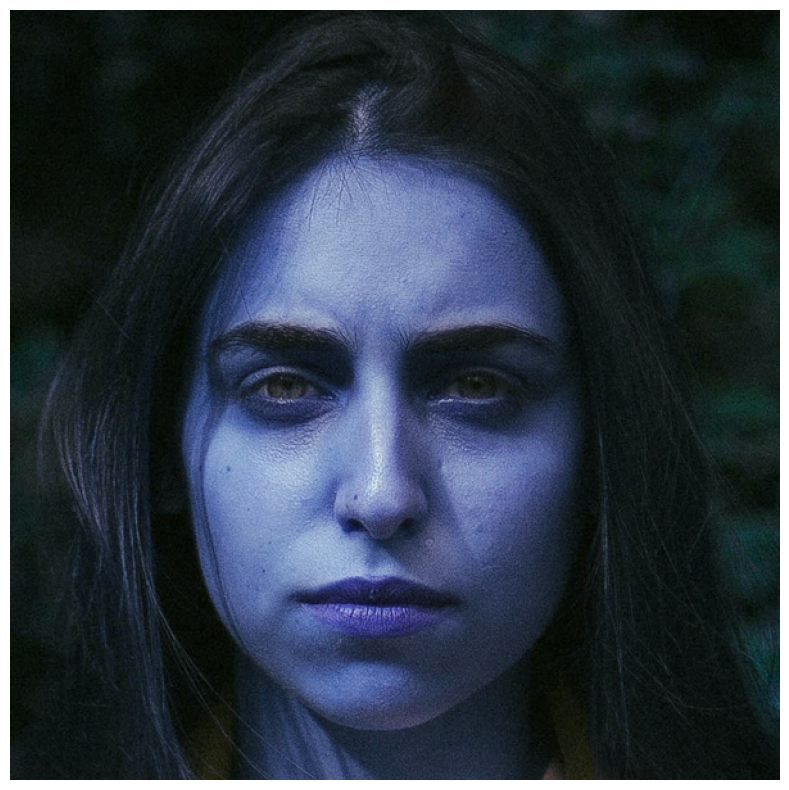

In [29]:
# Display the first 10 images
# Print the first 1 masked images
for i in range(0, 1):
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.axis("off")
    plt.imshow(ImageFileData[i])
plt.show()

### <a name = 'link231'> b) Detect faces, extract metadata for the faces in all the images, and write and save it into a DataFrame </a>

In [30]:
# Object Detection using Haar feature-based cascade classifiers is an effective object detection method. 
# For more details we can refer to https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [31]:
x_cord=[]
y_cord=[]
height=[]
width=[]
face_detected=[]
image_name=[]

In [32]:
# We will use cv2.
def visualize_faces(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

**Observations:**
- Function is created successfully.

In [33]:
for i in range (len(DirList)):

    # Create a cascade classfier object
    FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")   # frontal face 
    
    data_path = os.path.join(ImageFolder,DirList[i])

    print("Execution loop = ", i, "for file: ", data_path)
    image = cv2.imread(data_path)
    
    # Convert the image to grayscale (required for Haar cascade)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Detect faces in the image
    faces = FaceCascade.detectMultiScale(gray_image, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))

    j = 0
    
    # Add metadata for each detected face
    for (x, y, w, h) in faces:
        rect_mage = cv2.rectangle(gray_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        j = j + 1

    resized = cv2.resize(image, (int(gray_image.shape[1] / 2), int(gray_image.shape[0])))

    length = len(faces)

    name = DirList[i]

    if length == 0:
        a = 0
        b = 0
        c = 0
        d = 0
        j = 0

    else:
        a = faces[0,0]
        b = faces[0,1]
        c = faces[0,2]
        d = faces[0,3]  
        

    x_cord.append(a)
    y_cord.append(b)
    width.append(c)
    height.append(d)
    face_detected.append(j)
    image_name.append(name)
    
    # Optional: Visualize detected faces
    print(f"Detected {len(faces)} faces in {name}.")

Execution loop =  0 for file:  training_images/real_00251.jpg
Detected 1 faces in real_00251.jpg.
Execution loop =  1 for file:  training_images/real_00537.jpg
Detected 1 faces in real_00537.jpg.
Execution loop =  2 for file:  training_images/real_00523.jpg
Detected 1 faces in real_00523.jpg.
Execution loop =  3 for file:  training_images/real_00245.jpg
Detected 1 faces in real_00245.jpg.
Execution loop =  4 for file:  training_images/real_00279.jpg
Detected 1 faces in real_00279.jpg.
Execution loop =  5 for file:  training_images/real_00292.jpg
Detected 1 faces in real_00292.jpg.
Execution loop =  6 for file:  training_images/real_00286.jpg
Detected 1 faces in real_00286.jpg.
Execution loop =  7 for file:  training_images/real_00735.jpg
Detected 2 faces in real_00735.jpg.
Execution loop =  8 for file:  training_images/real_00053.jpg
Detected 1 faces in real_00053.jpg.
Execution loop =  9 for file:  training_images/real_00047.jpg
Detected 2 faces in real_00047.jpg.
Execution loop =  10

In [52]:
# Convert metadata into a DataFrame
face_df = pd.DataFrame()
face_df["x_cord"] = x_cord
face_df["y_cord"] = y_cord
face_df["width"] = width
face_df["height"] = height
face_df["total_faces"] = face_detected
face_df["image_file_name"] = image_name
face_df.head()

x_cord  y_cord  width  height  total_faces image_file_name
0      93     140    391     391            1  real_00251.jpg
1      56      78    473     473            1  real_00537.jpg
2     116     151    382     382            1  real_00523.jpg
3      82     135    395     395            1  real_00245.jpg
4     153     211    371     371            1  real_00279.jpg

In [53]:
# Print the rows in the datasframe face_df
display(Markdown("**Observations:**\n"))
display(Markdown("- The number rows in the dataframe is: {}.".format(face_df.shape[0])))

**Observations:**


- The number rows in the dataframe is: 1091.

In [54]:
# Total images where no faces were read
display(Markdown("**Observations:**\n"))
display(Markdown("- Total images where no faces were read is: {}.".format(face_df[face_df["total_faces"] == 0].shape[0])))

**Observations:**


- Total images where no faces were read is: 184.

In [55]:
# Save dataframe to a CSV file
face_df.to_csv("real_face_images.csv")

**Observations:**
- The real face image details are saved successfully to the file real_face_images.csv

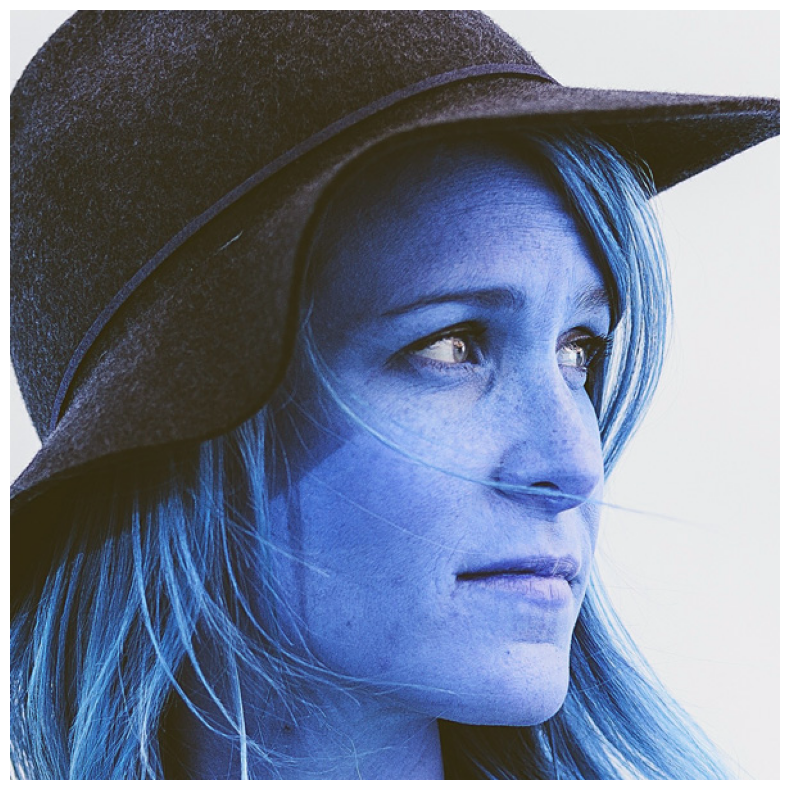

In [56]:
# Choose a random image to display
file_path = os.path.join(ImageFolder, face_df[face_df["total_faces"] == 0]["image_file_name"].iloc[0])
unreal_image = cv2.imread(file_path)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(unreal_image)
plt.show()

**Observations:**
- The HAAR model was able to identify real faces for the given dataset.
- It identified 186 unreal images and detecting the unreal image was helpful.|

# <a name = 'link3'> II. Part - B </a>

a) Unzip, read and Load data(‘PINS.zip’) into session.

Unzip all the files and extract them.


Reference: https://appdividend.com/2022/01/19/pythonunzip/#:~:text=To%20unzip%20a%20file%20in,inbuilt%20python%20module%20called%20zipfile.


 b) Write function to create metadata of the image.

 Define a function to create metadata from the images.


 c) Write a loop to iterate through each and every image and create metadata for all the images.

 Define an algorithm which can iterate through each and every image and create metadata for all the images using the function defined above.

## <a name = 'link31'> Part II: Data Preprocessing </a>

### <a name = 'link311'> a) Import the data ‘PINS.zip’ </a>

#### Q1 - Extract and load 'PINS'

In [62]:
# Using the unzip os command
with ZipFile("PINS.zip", "r") as zip:
  zip.extractall()

**Observations:**
- The files PINS.zip is extracted successfully.

### <a name = 'link312'> b) Read the images and extract labels from the filenames for all the folders </a>

#### Q2 - Function to create metadata of the image

In [101]:
# Use the class provided in the hint file.

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

#### Q3 - Function to load metadata

In [102]:
def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata), exts

In [103]:
def load_image(path):
  img = cv2.imread(path, 1)
  # OpenCV loads images with color channels
  # in BGR order. So we need to reverse them
  return img[...,::-1]

In [105]:
metadata, exts = load_metadata('PINS')
labels = np.array([meta.name for meta in metadata])

In [106]:
n = np.random.randint(1, len(metadata))
img_path = metadata[n].image_path()
img = load_image(img_path)

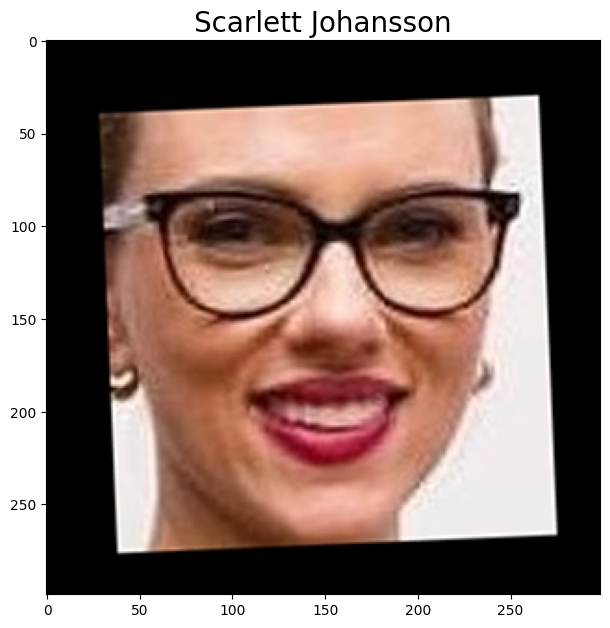

In [107]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
title = labels[n].split('_')[1]
ax.set_title(title, fontsize = 20)
_ = plt.imshow(img)

## <a name = 'link32'> Part II: Visualizing Similar Images </a>

### <a name = 'link321'> a) Generate embedding vectors for each image in the dataset </a>

#### Q4 - Generate embedding vectors

In [68]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape = (224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation("softmax"))
    return model

In [69]:
model = vgg_face()
model.load_weights("vgg_face_weights.h5")

In [70]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [71]:
# Getting embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtaining embedding vector for an image
# Getting the embedding vector for the above image using vgg_face_descriptor model and printing the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
(2622,)


In [72]:
x = 0
for i, meta in enumerate(metadata):
    x = x + 1
print("Total metadata: ", x)

Total metadata:  10770


In [73]:
# Define embeddings

embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))

In [74]:
print(embeddings[0])
print(embeddings[10669])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


**Observations:**
- Embeddings with default zeros are successfully created.

In [ ]:
# Generate embeddings for all the images

for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image / 255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embeddings[i] = np.zeros(2622)

0it [00:00, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

In [76]:
print(embeddings[0])
print(embeddings[10669])

[ 0.0142315   0.00407747 -0.00861883 ... -0.00646766  0.00643114
  0.01167793]
[ 0.01708231 -0.00055551  0.00864967 ... -0.01179124 -0.01026443
 -0.00716382]


**Observations:**
- The embeddings are created for all the images

### <a name = 'link322'> b) Choose a distance metric and use it along with a threshold to display similar and dissimilar images </a>

#### Q5 - Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [77]:
# Function to calculate distance between given 2 pairs of images.

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

**Observations:**
- The function is successfully created

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

In [78]:
# Defin the function show_pair and use the same to show the distance between the two pairs

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

**Observations:**
- The function is created successfully.

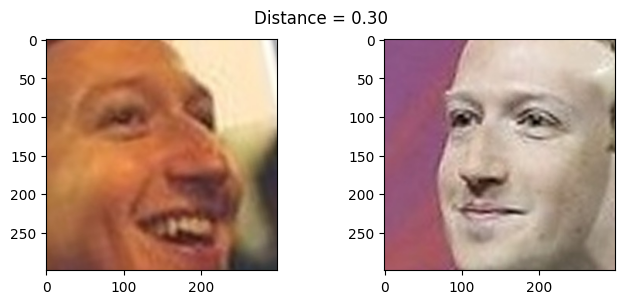

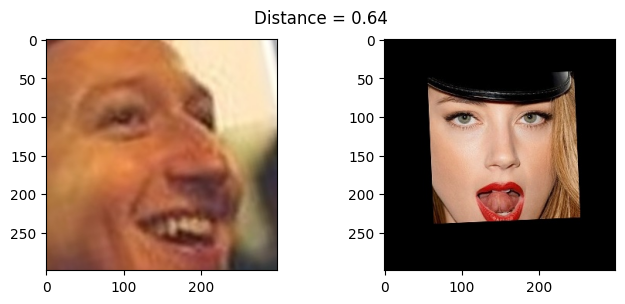

In [79]:
# Plot the images and get distance between the pairs 2, 3 and 2, 180
show_pair(2, 3)
show_pair(2, 180)

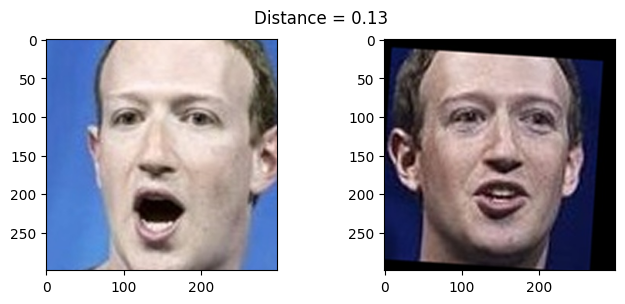

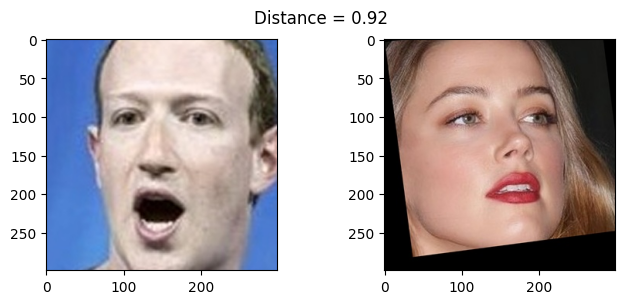

In [80]:
# Plot the images and get distance between the pairs 30, 31 and 30, 100
show_pair(30, 31)
show_pair(30, 100)

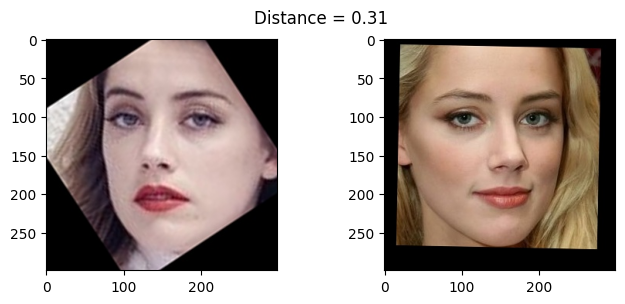

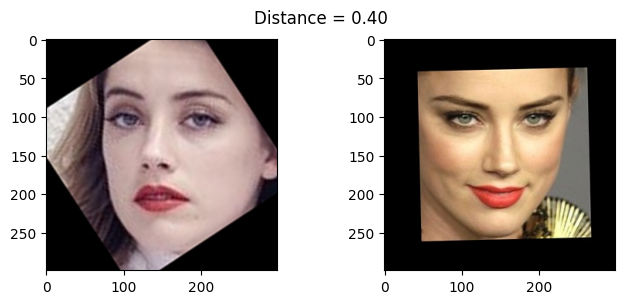

In [81]:
# Plot the images and get distance between the pairs 70, 72 and 70, 115
show_pair(70, 72)
show_pair(70, 115)

**Observations:**
- We can see that similar faces have lesser distance and distinct faces have farther distance.
- The model is helpful in identifying the person based on the image.

# <a name = 'link4'> III. Part - C </a>

## <a name = 'link41'> Part III: Model Building and Inference </a>

### <a name = 'link411'> a) Apply PCA on the embedding vectors </a>

#### Q6 - Create train and test sets and Apply PCA
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [82]:
#every 9th example goes in test data and rest go in train data

train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

display(Markdown("**Observations**"))
display(Markdown("- X_Train dataset: {}.".format(X_train.shape)))
display(Markdown("- X_Test dataset: {}.".format(X_test.shape)))
display(Markdown("- Y_Train dataset: {}.".format(y_train.shape)))
display(Markdown("- Y_Test dataset: {}.".format(y_test.shape)))

**Observations**

- X_Train dataset: (9573, 2622).

- X_Test dataset: (1197, 2622).

- Y_Train dataset: (9573,).

- Y_Test dataset: (1197,).

**Observations:**
- The Train data contains 9573 rows and the test data contains 1197 rows.

In [83]:
# Encode the targets using LabelEncoder()

encoder = LabelEncoder()

# Numerical encoding of identities
y_train_en = encoder.fit_transform(y_train)
y_test_en = encoder.transform(y_test)

**Observations:**
- Train and test data from target "y" is encoded using LabelEncoder() successfully.

In [84]:
# Standarizing features

standard_scale = StandardScaler()
X_train_stand = standard_scale.fit_transform(X_train)
X_test_stand = standard_scale.transform(X_test)

**Observations:**
- The train and test data features are standardized successfully.

In [85]:
# Calculating covariance matrix
cov_matrix = np.cov(X_train_stand.T)
print('The shape of covariance matrix is:', cov_matrix.shape)
print('The covariance matrix is:\n', cov_matrix) 

The shape of covariance matrix is: (2622, 2622)
The covariance matrix is:
 [[ 1.00010447  0.12353531  0.109328   ...  0.08000894 -0.12426469
  -0.25378286]
 [ 0.12353531  1.00010447  0.23336156 ... -0.0367241   0.28052635
   0.21764001]
 [ 0.109328    0.23336156  1.00010447 ... -0.11064615  0.07094103
   0.04397776]
 ...
 [ 0.08000894 -0.0367241  -0.11064615 ...  1.00010447 -0.02465831
  -0.09740443]
 [-0.12426469  0.28052635  0.07094103 ... -0.02465831  1.00010447
   0.39558199]
 [-0.25378286  0.21764001  0.04397776 ... -0.09740443  0.39558199
   1.00010447]]


In [86]:
# calculating Eigen Values and Eigen Vectors

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('The Eigen Vectors are:\n', eigen_vectors)
print('\nThe Eigen Values are:\n', eigen_values)

The Eigen Vectors are:
 [[ 0.02390596  0.02035134 -0.00303734 ... -0.00824097  0.01495775
   0.00197767]
 [-0.0087222  -0.00111841 -0.00144489 ... -0.03260853 -0.00840309
  -0.01752565]
 [ 0.00294545  0.00833963  0.0080823  ...  0.02020984 -0.01345687
   0.01323473]
 ...
 [ 0.00837827 -0.02327481 -0.01031013 ... -0.0029897   0.01474879
   0.01862915]
 [-0.02124431 -0.00502821  0.00154574 ...  0.00746318  0.0212827
  -0.00421306]
 [-0.03888138  0.0109641   0.01690454 ... -0.0001844  -0.02140655
   0.0005522 ]]

The Eigen Values are:
 [3.55842472e+02 1.41774985e+02 1.04127752e+02 ... 1.74947228e-03
 1.75503765e-03 1.75875786e-03]


In [87]:
# Cumulative Variance Explained

total = sum(eigen_values)
variance_exp = [(i / total) * 100 for i in sorted(eigen_values, reverse = True)]
cummulative_variance_exp = np.cumsum(variance_exp)
print('Cumulative Variance Explained:\n', cummulative_variance_exp)

Cumulative Variance Explained:
 [ 13.5699962   18.97656275  22.94745807 ...  99.99999983  99.99999999
 100.        ]


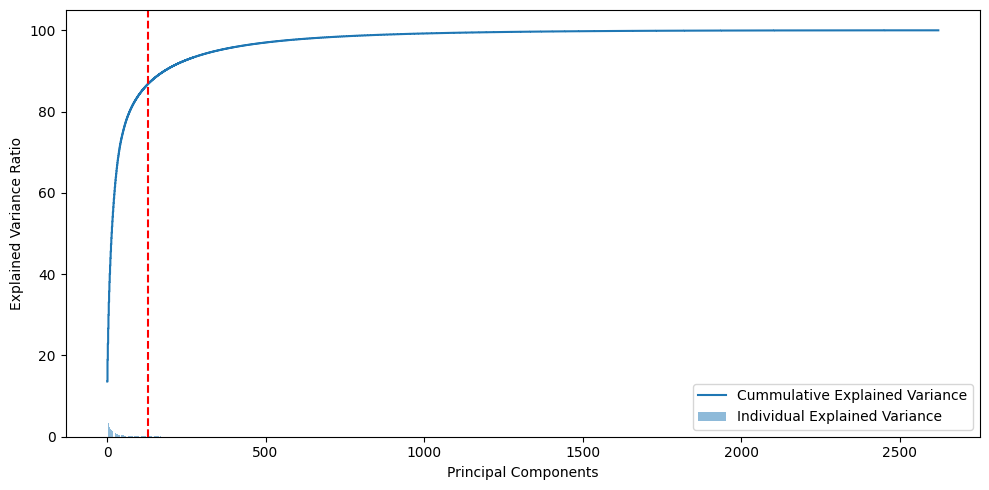

In [88]:
# visualizing the plot: principal component vs explained variance ratio

plt.figure(figsize = (10, 5))
plt.bar(range(1, eigen_values.size + 1), variance_exp, alpha = 0.5, align = 'center', label = 'Individual Explained Variance')
plt.step(range(1, eigen_values.size + 1), cummulative_variance_exp, where = 'mid', label = 'Cummulative Explained Variance')
plt.axvline(x = 128, color = 'r', linestyle = '--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**Observations:**
- The graph shows a seetp curve after 100.
- Hence the provided components of 128 can be considered.

In [89]:
# Reduce feature dimensions using Principal Component Analysis
# Set the parameter n_components = 128

pca = PCA(n_components = 128, svd_solver = 'full', whiten = True)
pca.fit(X_train_stand)

X_train_pca = pca.transform(X_train_stand)
X_test_pca = pca.transform(X_test_stand)

display(X_train_pca.shape, X_test_pca.shape)

(9573, 128)

(1197, 128)

**Observations:**
- PCA is successfully applied on the dataset.
- The features are reduced from 2622 to 128.

### <a name = 'link412'> b) Build and train a SVM classifier on top of it </a>

#### Q7 - Train the SVM classifier and print the score

The best classifier is:  SVC(C=10.0, class_weight='balanced', gamma=0.01)


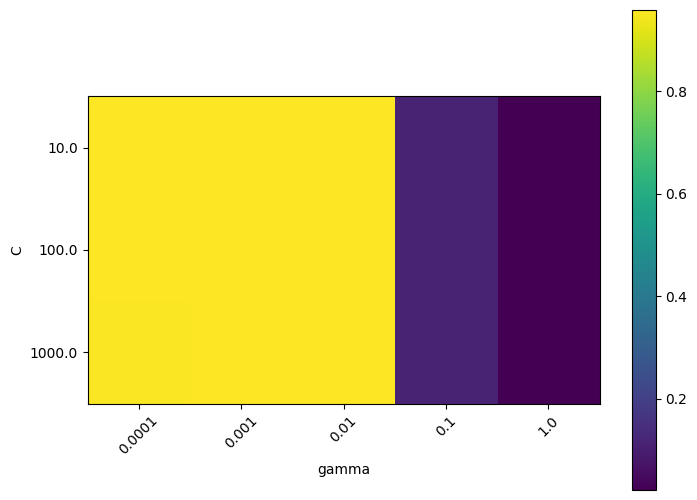

In [90]:
# Use SVM Classifier to predict the person in the given image
# Fit the classifier and print the score

C_range = 10. ** np.arange(1,4)
gamma_range = 10. **np.arange(-4,1)

param_grid = dict(gamma = gamma_range, C = C_range)

grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

grid.fit(X_train_pca, y_train_en)
print('The best classifier is: ', grid.best_estimator_)

score_dict = grid.cv_results_

scores = score_dict.get('mean_test_score')
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

**Observations:**
- The best classifier that was obtained is SVC(C=10.0, class_weight='balanced', gamma=0.01)
- We will use the same to build the mode.

In [91]:
# Use the best classifier to build the model
svc_model = SVC(C=10.0, class_weight='balanced', gamma=0.01)
svc_model.fit(X_train_pca, y_train_en)

SVC(C=10.0, class_weight='balanced', gamma=0.01)

**Observations:**
- SVC model is successfully created.

In [92]:
# Use the above model to predict the target variable
pred_svm = svc_model.predict(X_test_pca)
display(Markdown("**Observations:**"))
display(Markdown("- Accuracy obtained from the model: {}".format(accuracy_score(y_test_en, pred_svm))))

**Observations:**

- Accuracy obtained from the model: 0.9632414369256475

In [108]:
# # Classification Report per person

names = [name.split('_')[1].title().strip() for name in labels]

print('Classification Report: \n{}'.format(classification_report(y_test_en, pred_svm, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      1.00      1.00        10
      Alexandra Daddario       1.00      1.00      1.00        10
            Alvaro Morte       1.00      0.93      0.96        14
Alycia Debnam Carey Face       1.00      0.92      0.96        12
             Amanda Crew       1.00      0.88      0.93         8
          Amaury Nolasco       1.00      1.00      1.00         9
        Amber Heard Face       1.00      1.00      1.00         8
               Anna Gunn       1.00      0.93      0.96        14
           Anne Hathaway       1.00      0.92      0.96        13
     Barbara Palvin Face       1.00      0.89      0.94         9
      Bellamy Blake Face       0.82      1.00      0.90        14
    Benedict Cumberbatch       1.00      1.00      1.00        12
            Betsy Brandt       1.00      1.00      1.00        10
              Bill Gates       1.00      1.00      

**Observations:**

*   The perofrmrance is good for many people. The accuracy of classification was 100% for many faces.

### <a name = 'link413'> c) Use the trained SVM model to predict the labels of the test images </a>

#### Q8 - Import and display test images

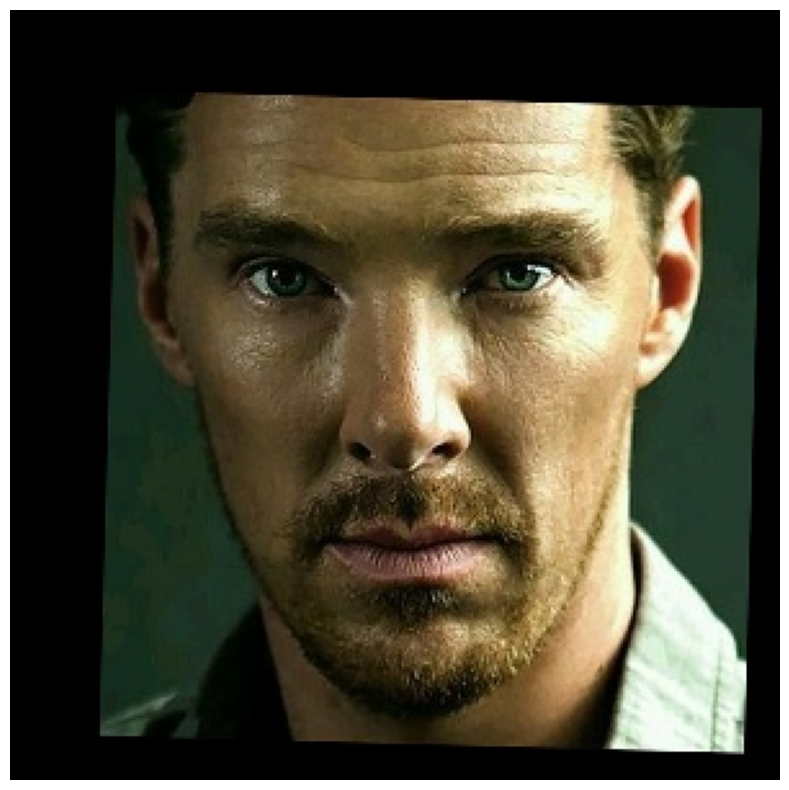

In [109]:
# Import and display Benedict+Cumberbatch9.jpg

Benedict_Cumberbatch_Image = cv2.imread("Benedict+Cumberbatch9.jpg")
Benedict_Cumberbatch_Image_RGB = cv2.cvtColor(Benedict_Cumberbatch_Image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(Benedict_Cumberbatch_Image_RGB)
plt.show()

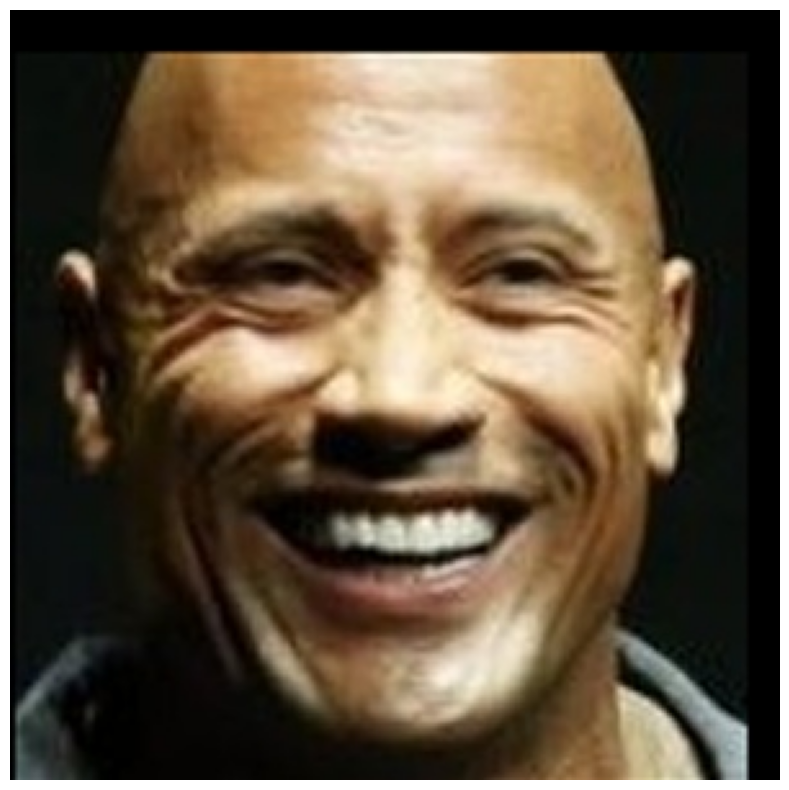

In [110]:
# Import and display Dwayne+Johnson4.jpg
Dwayne_Johnson_Image = cv2.imread("Dwayne+Johnson4.jpg")
Dwayne_Johnson_Image_RGB = cv2.cvtColor(Dwayne_Johnson_Image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(Dwayne_Johnson_Image_RGB)
plt.show()

#### Q9 - Use the trained SVM model to predict the face on both test images

In [111]:
# Use the load_mage to prepare the metadata for Benedict Cumberbatch
Benedict_Cumberbatch_metadata = load_image("Benedict+Cumberbatch9.jpg")

# Normalizing pixel values
Benedict_Cumberbatch_image = (Benedict_Cumberbatch_metadata/255.).astype(np.float32)

# Resize the image
Benedict_Cumberbatch_image_resized = cv2.resize(Benedict_Cumberbatch_image, (224, 224))

# Obtain embedding vector for sample image
Benedict_Cumberbatch_embedding = vgg_face_descriptor.predict(np.expand_dims(Benedict_Cumberbatch_image_resized, axis = 0))[0]

# Scaled the vector and reshape
Benedict_Cumberbatch_embedding_scaled = standard_scale.transform(Benedict_Cumberbatch_embedding.reshape(1, -1))

# Predict the person in the image using the model
Benedict_Cumberbatch_pred = svc_model.predict(pca.transform(Benedict_Cumberbatch_embedding_scaled))

# Extract the name of the predicted person
Benedict_Cumberbatch_pred_name = encoder.inverse_transform(Benedict_Cumberbatch_pred)[0].split('_')[-1].title().strip()

# Print the name predicted
print(Benedict_Cumberbatch_pred_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Benedict Cumberbatch


In [112]:
# Use the load_mage to prepare the metadata for Dwayne Johnson
Dwayne_Johnson_metadata = load_image("Dwayne+Johnson4.jpg")

# Normalizing pixel values
Dwayne_Johnson_image = (Dwayne_Johnson_metadata/255.).astype(np.float32)

# Resize the image
Dwayne_Johnson_image_resized = cv2.resize(Dwayne_Johnson_image, (224, 224))

# Obtain embedding vector for sample image
Dwayne_Johnson_embedding = vgg_face_descriptor.predict(np.expand_dims(Dwayne_Johnson_image_resized, axis = 0))[0]

# Scaled the vector and reshape
Dwayne_Johnson_embedding_scaled = standard_scale.transform(Dwayne_Johnson_embedding.reshape(1, -1))

# Predict the person in the image using the model
Dwayne_Johnson_pred = svc_model.predict(pca.transform(Dwayne_Johnson_embedding_scaled))

# Extract the name of the predicted person
Dwayne_Johnson_pred_pred_name = encoder.inverse_transform(Dwayne_Johnson_pred)[0].split('_')[-1].title().strip()

# Print the name predicted
print(Dwayne_Johnson_pred_pred_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Dwayne Johnson


**Observations:**
- Both images were predicted correctly.
- The model is doing comparitively good with new unseen data.

# <a name = 'link4'> IV. Actionable Insights & Recommendations </a>

## <a name = 'link41'> Write down insights from the analysis conducted </a>

- We created a face identification model to recognize aligned (faces) for 100 different persons in a dataset containing 10,770 images 
- Here, we used a pre-trained model (VGG model with pre-trained weights)  to generate embeddings for each images in the dataset
- Distance between two pair of images were also calculated and plotted
- Since, there were 2,622 features for each image, PCA was used for dimension reduction after standardizing the features
- We used 128 PCA components where a cummulative explained variance of more than 80% was obtained
- In order to predicted the labels for test dataset, Support Vector Machine-Classifier (SVC) was used where an accuracy of 96.2% was obtained
- The model so obtained was clearly able to predict the 10th image of the dataset (which belonged to Alvaro Morte)
- After that we also tried to compare the predicted and actual labels for 30 random images from test dataset, in which a huge success was obtained.

## <a name = 'link42'> Provide actionable business recommendations </a>

- Here, the company X wants to build an application that can automatically detect the cast and crew at any given seen.
- This can be achieved by three steps.
   - 1. Identifying the faces in a scene.
   - 2. Categorising whether the face is real or not.
   - 3. Predict the name of the face that is identified.
- This notebook performs all the three actions mentioned above and the buinsess requirements have met in most of the cases.
- Using the pre-trained MobileNet model we have used Images.npy to train a new model to detect the faces. However, the Images.npy has only 393 images and this is not a good amount of dataset in order to train a model efficiently. An actionable business recommendation for the company X would be to use more data in Imapges.npy in order to have a better trained module that can identify more facial patches in a given frame. Another actionable item would be to include wide veriety of faces with lots of diversity in ethnicity, age, gender etc.
- Using face_cascade, we have also developed model that can distinguish the real faces from unreal faces. This is a helpful model in identifying the real faces. However, certain movies demand certain characters to appear slightly un-realistic (e.g, when the character is possessed by the ghost etc) then there is a probability that this trained model might neglect the face from being recognized as the model categorises as unrealistic. Hence, another actionable business recommendations to the company X would be to allow faces that were detected as unrealistic under such circumstances.
- Using the pretrained VGG model and with a lots of data for each actor the SVC model is able to predict the faces present in the images. The model is significantly efficient to perform this classification. However, we have to be aware that the facial structures keep changing for various actors due to age, cosmetic surgeries etc. The training data should be as diverse as possible for each actor so that the model can work efficiently.